In [1]:
import numpy as np

In [2]:
import pandas as pd

In [4]:
import requests
from tqdm import tqdm
database = []
for j in tqdm(np.linspace(-35,-45,21)):
    for i in np.linspace(-340,-330,21):
        params = {
        'token': 'd4afff4abdbd332161944cc593b8d2',
        'longitude': i,
        'latitude': j,
        'variableIDs': 'SofarOperationalWaveModel-significantWaveHeight'
        }
        response = requests.get(
        url='https://api.sofarocean.com/marine-weather/v1/models/SofarOperationalWaveModel/forecast/point',
        params=params )
        data = response.json()
        wave_condition = data['forecastVariables'][0]['values'][:21]
        condition =[]
        for k, dic in enumerate(wave_condition):
            condition.append(wave_condition[k]['value'])
        database.append(condition)

100%|██████████| 21/21 [08:55<00:00, 25.51s/it]


In [5]:
df = pd.DataFrame(database)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,4.00,3.99,3.96,3.92,3.86,3.81,3.75,3.69,3.63,3.57,...,3.44,3.38,3.33,3.28,3.24,3.20,3.17,3.14,3.10,3.05
1,3.90,3.90,3.88,3.84,3.78,3.72,3.67,3.62,3.56,3.50,...,3.37,3.31,3.25,3.20,3.16,3.12,3.09,3.06,3.03,2.99
2,4.15,4.16,4.12,4.05,3.97,3.91,3.86,3.80,3.73,3.66,...,3.51,3.43,3.36,3.31,3.27,3.22,3.18,3.13,3.09,3.05
3,4.33,4.32,4.28,4.24,4.21,4.14,4.07,3.97,3.89,3.83,...,3.67,3.59,3.51,3.46,3.41,3.37,3.31,3.26,3.19,3.14
4,4.28,4.27,4.24,4.22,4.18,4.14,4.07,4.01,3.96,3.87,...,3.75,3.68,3.61,3.52,3.45,3.39,3.34,3.30,3.26,3.21


<IPython.core.display.Javascript object>


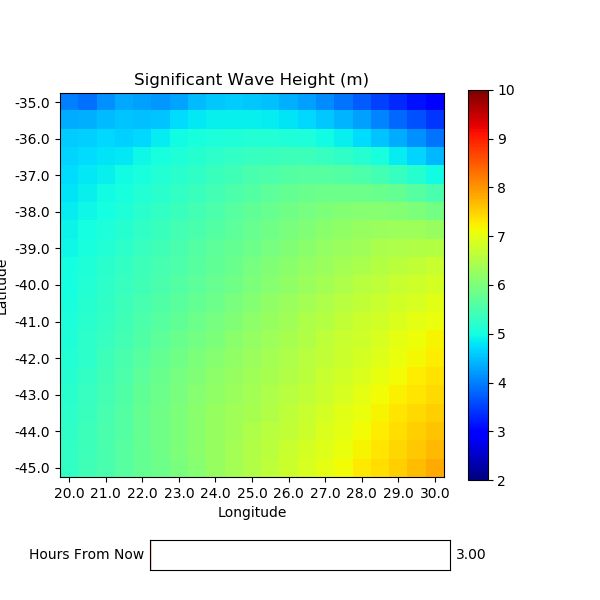

0

In [8]:
from matplotlib.widgets import Slider  # import the Slider widget
import matplotlib.pyplot as plt
%matplotlib notebook


a_min = 3    # the minimial value of the paramater a
a_max = 23  # the maximal value of the paramater a
a_init = 3   # the value of the parameter a to be used initially, when the graph is created
a_step = 1  # step size for the slider

fig = plt.figure(figsize=(6,6))

# first we create the general layount of the figure
# with two axes objects: one for the plot of the function
# and the other for the slider
ax = plt.axes([0.1, 0.2, 0.8, 0.65])
slider_ax = plt.axes([0.25, 0.05, 0.5, 0.05])


# in "plot" we plot the function with the initial value of the parameter a
plt.axes(ax)
plt.xticks(np.arange(0,21,2), np.linspace(20, 30, 11))
plt.xlabel('Longitude')
plt.yticks(np.arange(0,21,2), np.linspace(-35, -45, 11))
plt.ylabel('Latitude')
plt.title('Significant Wave Height (m)')
plt.rc('image', cmap='jet')
plot = plt.imshow(np.reshape(df[0].values,(21,21)))
fig.colorbar(plot)
plt.clim(2.0, 10.0)

# here we create the slider
a_slider = Slider(slider_ax,      # the axes object containing the slider
                  'Hours From Now', # the name of the slider parameter
                  a_min,          # minimal value of the parameter
                  a_max,          # maximal value of the parameter
                  valinit=a_init,  # initial value of the parameter
                  valstep=1
                  )

# Next we define a function that will be executed each time the value
# indicated by the slider changes. The variable of this function will
# be assigned the value of the slider.
def update(val):
    col = a_slider.val
    plot.set_data(np.reshape(df[(col-3)].values,(21,21))) # set new data of the plotted points
    fig.canvas.draw_idle()          # redraw the plot

    
# the final step is to specify that the slider needs to
# execute the above function when its value changes
a_slider.on_changed(update)



